In [1]:
#condidence interval
import scipy.stats as st
import numpy as np
import pandas as pd

# example data
data = pd.read_excel('amazonprediction.xlsx')
data1 = data['predictions'].tolist()

# calculate the confidence interval
confidence_interval = st.t.interval(0.95, len(data)-1, loc=np.mean(data1), scale=st.sem(data1))

# print the confidence interval
print("The 95% confidence interval for the data is:", confidence_interval)

The 95% confidence interval for the data is: (2017.590009507751, 2107.175961077171)


In [2]:
import pandas as pd

# Get the length of the file
length = len(data1)

# Print the length of the file
def dayscal(length):
    years, length = divmod(length, 365)
    months, length = divmod(length, 30)
    weeks, length = divmod(length, 7)
    print("we are approximately talking about {} years, {} months, {} weeks and {} days of predicted data.".format(years,months,weeks,length))
dayscal(length)



we are approximately talking about 3 years, 4 months, 2 weeks and 2 days of predicted data.


In [3]:
#sorting the list
data1.sort()
#counting the number of elements in a given range
lower_bound = 0
upper_bound = 1000

count = 0
for num in data1:
    if lower_bound <= num <= upper_bound:
        count += 1

print(count)
rf = count/999

lower_bound = 1001
upper_bound = 2000

count1 = 0
for num in data1:
    if lower_bound <= num <= upper_bound:
        count1 += 1

print(count1)
rf1 = count1/999

lower_bound = 2001
upper_bound = 3000

count2 = 0
for num in data1:
    if lower_bound <= num <= upper_bound:
        count2 += 1

print(count2)
rf2 = count2/999

lower_bound = 3001
upper_bound = 4000

count3 = 0
for num in data1:
    if lower_bound <= num <= upper_bound:
        count3 += 1

print(count3)
rf3 = count3/999

countlist = [101,633,169,328]
countrange = ['0-1000','1000-2000','2001-3000','3001-4000']
x = [1,2,3,4]

101
633
169
328


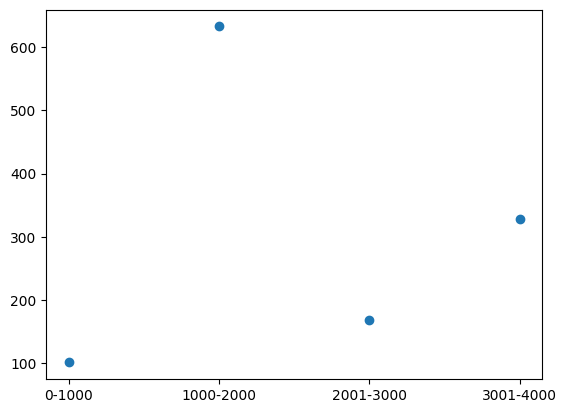

In [4]:
import matplotlib.pyplot as plt
plt.scatter(countrange, countlist)
plt.show()

In [5]:
print("the frequency for the range 0-1000 is {}".format(count))
print("the frequency for the range 1001-2000 is {}".format(count1))
print("the frequency for the range 2001-3000 is {}".format(count2))
print("the frequency for the range 3001-4000 is {}".format(count3))

the frequency for the range 0-1000 is 101
the frequency for the range 1001-2000 is 633
the frequency for the range 2001-3000 is 169
the frequency for the range 3001-4000 is 328


In [6]:
import statistics

# Mean
mean = sum(data1) / len(data1)
print('Mean:', mean)

# Median
median = statistics.median(data1)
print('Median:', median)

# Mode
mode = statistics.mode(data1)
print('Mode:', mode)

# Variance
variance = statistics.variance(data1)
print('Variance:', variance)

# Standard deviation
std_dev = statistics.stdev(data1)
print('Standard deviation:', std_dev)

# IQR
q1, q3 = np.percentile(data1, [25, 75])
iqr = q3 - q1
print('IQR:', iqr)

Mean: 2062.382985292461
Median: 1910.651245117188
Mode: 815.2151489257812
Variance: 641691.9221560329
Standard deviation: 801.0567533926875
IQR: 1512.343566894531


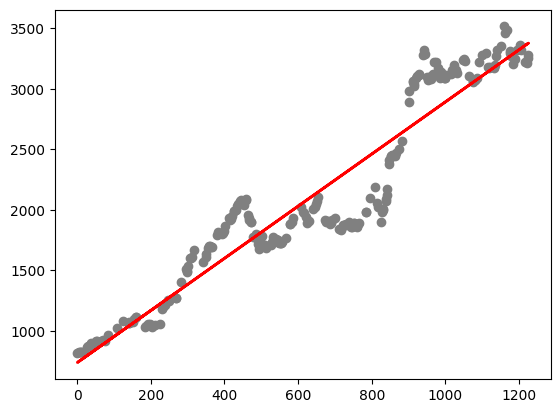

In [7]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# Prepare the data
X = data['num'].values.reshape(-1, 1)
y = data['predictions'].values.reshape(-1, 1)

# Split the data into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Create the linear regression model
regressor = LinearRegression()

# Train the model
regressor.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = regressor.predict(X_test)

# Plot the linear regression line
plt.scatter(X_test, y_test, color='gray')
plt.plot(X_test, y_pred, color='red', linewidth=2)
plt.show()
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

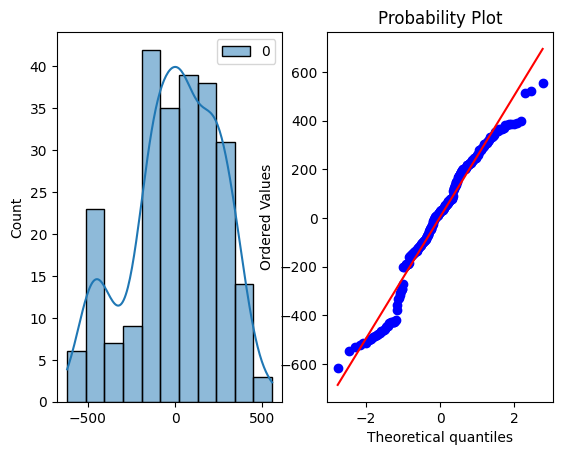

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

residuals = y_test - y_pred

fig, ax = plt.subplots(1, 2)

sns.histplot(residuals, kde=True, ax=ax[0])
stats.probplot(residuals.flatten(), plot=ax[1])
plt.show()



In [9]:
shapiro_test = stats.shapiro(residuals)
print(f'Shapiro-Wilk test statistic: {shapiro_test[0]}')
print(f'Shapiro-Wilk p-value: {shapiro_test[1]}')

Shapiro-Wilk test statistic: 0.9681853652000427
Shapiro-Wilk p-value: 2.553552621975541e-05


In [10]:
anderson_test = stats.anderson(residuals.flatten(), dist='norm')
print(f'Anderson-Darling test statistic: {anderson_test.statistic}')
print(f'Anderson-Darling critical values: {anderson_test.critical_values}')


Anderson-Darling test statistic: 2.206655935961635
Anderson-Darling critical values: [0.567 0.646 0.775 0.904 1.075]
